# **************Warning***************

### Do not run this notebook. This notebook is provided to show how we imported and downsized the original files. Since original files could not be upload them into our repo, this code will not run. Yours truly.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

In [2]:
#read the original csv file
mar_2020 = "../data/mar_2020.csv"
#create a df with pd
original_df = pd.read_csv(mar_2020,low_memory=False)
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Columns: 106 entries, id to reviews_per_month
dtypes: float64(21), int64(21), object(64)
memory usage: 41.1+ MB


In [3]:
#make a variable to store a list of the columns we will use for our analysis
col_list_work = ['id', 'host_id', 'host_since', 'host_is_superhost', 'host_listings_count', 'host_identity_verified', 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'bedrooms', 'beds', 'bed_type', 'price',
'availability_365']

In [4]:
#reduce original df with list of columns
mar_2020_red = original_df[col_list_work]

In [5]:
#filter host_listings_count != 0
mar_2020_red2 = mar_2020_red[mar_2020_red.host_listings_count != 0]
#filter host_identity_verified = t
mar_2020_red3 = mar_2020_red2[mar_2020_red2.host_identity_verified == 't']
#filter bed_type = real bed
mar_2020_red4 = mar_2020_red3[mar_2020_red3.bed_type == 'Real Bed']
#filter location = exact
mar_2020_red5 = mar_2020_red4[mar_2020_red4.is_location_exact == 't']
#filter bedrooms drop nan
mar_2020_red6= mar_2020_red5.dropna()
#replace bedrooms 0 with 1
mar_2020_red6.loc[(mar_2020_red6.bedrooms == 0 ), 'bedrooms']= 1
mar_2020_work = mar_2020_red6

/Users/umbertoleone/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


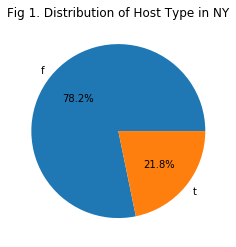

<Figure size 432x288 with 0 Axes>

In [6]:
host_grp = mar_2020_work.groupby(['host_is_superhost'])
host_grp_count = host_grp.count()['neighbourhood_group_cleansed']
host_grp_pie = host_grp_count.plot(kind="pie", autopct="%1.1f%%", \
                                 title=("Fig 1. Distribution of Host Type in NY"))
host_grp_pie.set_ylabel(None)
plt.show()

plt.tight_layout()

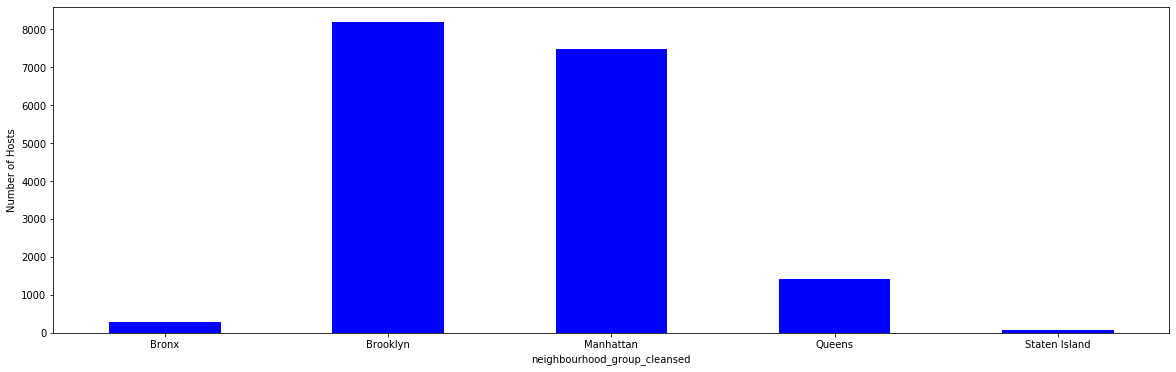

<Figure size 432x288 with 0 Axes>

In [7]:
host_grp = mar_2020_work.groupby(['neighbourhood_group_cleansed'])
host_grp_count = host_grp.count()['host_is_superhost']
# Plot with Pandas DataFrame.Plot multiplot 
multi_plot = host_grp_count.plot(kind="bar", figsize=(20,6), rot = 0, color='b')
multi_plot.set_ylabel('Number of Hosts')
plt.show()
plt.tight_layout()

In [8]:
#read the data 
#2020
feb_2020 = "../data/feb_2020.csv"
jan_2020 = "../data/jan_2020.csv"
#2019
dec_2019 = "../data/dec_2019.csv"
nov_2019 = "../data/nov_2019.csv"
oct_2019 = "../data/oct_2019.csv"
sep_2019 = "../data/sep_2019.csv"
aug_2019 = "../data/aug_2019.csv"
jul_2019 = "../data/jul_2019.csv"
jun_2019 = "../data/jun_2019.csv"
may_2019 = "../data/may_2019.csv"
apr_2019 = "../data/apr_2019.csv"
mar_2019 = "../data/mar_2019.csv"
feb_2019 = "../data/feb_2019.csv"
jan_2019 = "../data/jan_2019.csv"
#2018
dec_2018 = "../data/dec_2018.csv"
nov_2018 = "../data/nov_2018.csv"
oct_2018 = "../data/oct_2018.csv"
sep_2018 = "../data/sep_2018.csv"
aug_2018 = "../data/aug_2018.csv"
jul_2018 = "../data/jul_2018.csv"
jun_2018 = "../data/jun_2018.csv"
may_2018 = "../data/may_2018.csv"
apr_2018 = "../data/apr_2018.csv"
mar_2018 = "../data/mar_2018.csv"
feb_2018 = "../data/feb_2018.csv"
jan_2018 = "../data/jan_2018.csv"
#2017
dec_2017 = "../data/dec_2017.csv"
nov_2017 = "../data/nov_2017.csv"
oct_2017 = "../data/oct_2017.csv"
sep_2017 = "../data/sep_2017.csv"
aug_2017 = "../data/aug_2017.csv"
jul_2017 = "../data/jul_2017.csv"
jun_2017 = "../data/jun_2017.csv"
may_2017 = "../data/may_2017.csv"
apr_2017 = "../data/apr_2017.csv"
mar_2017 = "../data/mar_2017.csv"

In [9]:
## create data sets for each month and downside the number of columns
#2020
feb_2020_df = pd.read_csv(feb_2020, low_memory=False)
feb_2020_red = feb_2020_df[col_list_work]
jan_2020_df = pd.read_csv(jan_2020, low_memory=False)
jan_2020_red = jan_2020_df[col_list_work]

#2019
dec_2019_df = pd.read_csv(dec_2019, low_memory=False)
dec_2019_red = dec_2019_df[col_list_work]
nov_2019_df = pd.read_csv(nov_2019, low_memory=False)
nov_2019_red = nov_2019_df[col_list_work]
oct_2019_df = pd.read_csv(oct_2019, low_memory=False)
oct_2019_red = oct_2019_df[col_list_work]
sep_2019_df = pd.read_csv(sep_2019, low_memory=False)
sep_2019_red = sep_2019_df[col_list_work]
aug_2019_df = pd.read_csv(aug_2019, low_memory=False)
aug_2019_red = aug_2019_df[col_list_work]
jul_2019_df = pd.read_csv(jul_2019, low_memory=False)
jul_2019_red = jul_2019_df[col_list_work]
jun_2019_df = pd.read_csv(jun_2019, low_memory=False)
jun_2019_red = jun_2019_df[col_list_work]
may_2019_df = pd.read_csv(may_2019, low_memory=False)
may_2019_red = may_2019_df[col_list_work]
apr_2019_df = pd.read_csv(apr_2019, low_memory=False)
apr_2019_red = apr_2019_df[col_list_work]
mar_2019_df = pd.read_csv(mar_2019, low_memory=False)
mar_2019_red = mar_2019_df[col_list_work]
feb_2019_df = pd.read_csv(feb_2019, low_memory=False)
feb_2019_red = feb_2019_df[col_list_work]
jan_2019_df = pd.read_csv(jan_2019, low_memory=False)
jan_2019_red = jan_2019_df[col_list_work]

#2018

dec_2018_df = pd.read_csv(dec_2018, low_memory=False)
dec_2018_red = dec_2018_df[col_list_work]
nov_2018_df = pd.read_csv(nov_2018, low_memory=False)
nov_2018_red = nov_2018_df[col_list_work]
oct_2018_df = pd.read_csv(oct_2018, low_memory=False)
oct_2018_red = oct_2018_df[col_list_work]
sep_2018_df = pd.read_csv(sep_2018, low_memory=False)
sep_2018_red = sep_2018_df[col_list_work]
aug_2018_df = pd.read_csv(aug_2018, low_memory=False)
aug_2018_red = aug_2018_df[col_list_work]
jul_2018_df = pd.read_csv(jul_2018, low_memory=False)
jul_2018_red = jul_2018_df[col_list_work]
jun_2018_df = pd.read_csv(jun_2018, low_memory=False)
jun_2018_red = jun_2018_df[col_list_work]
may_2018_df = pd.read_csv(may_2018, low_memory=False)
may_2018_red = may_2018_df[col_list_work]
apr_2018_df = pd.read_csv(apr_2018, low_memory=False)
apr_2018_red = apr_2018_df[col_list_work]
mar_2018_df = pd.read_csv(mar_2018, low_memory=False)
mar_2018_red = mar_2018_df[col_list_work]
feb_2018_df = pd.read_csv(feb_2018, low_memory=False)
feb_2018_red = feb_2018_df[col_list_work]
jan_2018_df = pd.read_csv(jan_2018, low_memory=False)
jan_2018_red = jan_2018_df[col_list_work]

#2017

dec_2017_df = pd.read_csv(dec_2017, low_memory=False)
dec_2017_red = dec_2017_df[col_list_work]
nov_2017_df = pd.read_csv(nov_2017, low_memory=False)
nov_2017_red = nov_2017_df[col_list_work]
oct_2017_df = pd.read_csv(oct_2017, low_memory=False)
oct_2017_red = oct_2017_df[col_list_work]
sep_2017_df = pd.read_csv(sep_2017, low_memory=False)
sep_2017_red = sep_2017_df[col_list_work]
aug_2017_df = pd.read_csv(aug_2017, low_memory=False)
aug_2017_red = aug_2017_df[col_list_work]
jul_2017_df = pd.read_csv(jul_2017, low_memory=False)
jul_2017_red = jul_2017_df[col_list_work]
jun_2017_df = pd.read_csv(jun_2017, low_memory=False)
jun_2017_red = jun_2017_df[col_list_work]
may_2017_df = pd.read_csv(may_2017, low_memory=False)
may_2017_red = may_2017_df[col_list_work]
apr_2017_df = pd.read_csv(apr_2017, low_memory=False)
apr_2017_red = apr_2017_df[col_list_work]
mar_2017_df = pd.read_csv(mar_2017, low_memory=False)
mar_2017_red = mar_2017_df[col_list_work]


In [10]:
#downsizing 
#filter host_identity_verified = t
#filter bed_type = real bed
#filter location = exact
#filter bedrooms drop nan
#replace 0 bedrooms to 1

#2020
feb_2020_red = feb_2020_red[feb_2020_red.host_listings_count != 0]
feb_2020_red = feb_2020_red[feb_2020_red.host_identity_verified == 't']
feb_2020_red = feb_2020_red[feb_2020_red.bed_type == 'Real Bed']
feb_2020_red = feb_2020_red[feb_2020_red.is_location_exact == 't']
feb_2020_red = feb_2020_red.dropna()
feb_2020_red.loc[(feb_2020_red.bedrooms == 0 ), 'bedrooms']= 1
feb_2020_work = feb_2020_red

jan_2020_red = jan_2020_red[jan_2020_red.host_listings_count != 0]
jan_2020_red = jan_2020_red[jan_2020_red.host_identity_verified == 't']
jan_2020_red = jan_2020_red[jan_2020_red.bed_type == 'Real Bed']
jan_2020_red = jan_2020_red[jan_2020_red.is_location_exact == 't']
jan_2020_red = jan_2020_red.dropna()
jan_2020_red.loc[(jan_2020_red.bedrooms == 0 ), 'bedrooms']= 1
jan_2020_work = jan_2020_red

#2019
dec_2019_red = dec_2019_red[dec_2019_red.host_listings_count != 0]
dec_2019_red = dec_2019_red[dec_2019_red.host_identity_verified == 't']
dec_2019_red = dec_2019_red[dec_2019_red.bed_type == 'Real Bed']
dec_2019_red = dec_2019_red[dec_2019_red.is_location_exact == 't']
dec_2019_red = dec_2019_red.dropna()
dec_2019_red.loc[(dec_2019_red.bedrooms == 0 ), 'bedrooms']= 1
dec_2019_work = dec_2019_red

nov_2019_red = nov_2019_red[nov_2019_red.host_listings_count != 0]
nov_2019_red = nov_2019_red[nov_2019_red.host_identity_verified == 't']
nov_2019_red = nov_2019_red[nov_2019_red.bed_type == 'Real Bed']
nov_2019_red = nov_2019_red[nov_2019_red.is_location_exact == 't']
nov_2019_red = nov_2019_red.dropna()
nov_2019_red.loc[(nov_2019_red.bedrooms == 0 ), 'bedrooms']= 1
nov_2019_work = nov_2019_red

oct_2019_red = oct_2019_red[oct_2019_red.host_listings_count != 0]
oct_2019_red = oct_2019_red[oct_2019_red.host_identity_verified == 't']
oct_2019_red = oct_2019_red[oct_2019_red.bed_type == 'Real Bed']
oct_2019_red = oct_2019_red[oct_2019_red.is_location_exact == 't']
oct_2019_red = oct_2019_red.dropna()
oct_2019_red.loc[(oct_2019_red.bedrooms == 0 ), 'bedrooms']= 1
oct_2019_work = oct_2019_red

sep_2019_red = sep_2019_red[sep_2019_red.host_listings_count != 0]
sep_2019_red = sep_2019_red[sep_2019_red.host_identity_verified == 't']
sep_2019_red = sep_2019_red[sep_2019_red.bed_type == 'Real Bed']
sep_2019_red = sep_2019_red[sep_2019_red.is_location_exact == 't']
sep_2019_red = sep_2019_red.dropna()
sep_2019_red.loc[(sep_2019_red.bedrooms == 0 ), 'bedrooms']= 1
sep_2019_work = sep_2019_red

aug_2019_red = aug_2019_red[aug_2019_red.host_listings_count != 0]
aug_2019_red = aug_2019_red[aug_2019_red.host_identity_verified == 't']
aug_2019_red = aug_2019_red[aug_2019_red.bed_type == 'Real Bed']
aug_2019_red = aug_2019_red[aug_2019_red.is_location_exact == 't']
aug_2019_red = aug_2019_red.dropna()
aug_2019_red.loc[(aug_2019_red.bedrooms == 0 ), 'bedrooms']= 1
aug_2019_work = aug_2019_red

jul_2019_red = jul_2019_red[jul_2019_red.host_listings_count != 0]
jul_2019_red = jul_2019_red[jul_2019_red.host_identity_verified == 't']
jul_2019_red = jul_2019_red[jul_2019_red.bed_type == 'Real Bed']
jul_2019_red = jul_2019_red[jul_2019_red.is_location_exact == 't']
jul_2019_red = jul_2019_red.dropna()
jul_2019_red.loc[(jul_2019_red.bedrooms == 0 ), 'bedrooms']= 1
jul_2019_work = jul_2019_red

jun_2019_red = jun_2019_red[jun_2019_red.host_listings_count != 0]
jun_2019_red = jun_2019_red[jun_2019_red.host_identity_verified == 't']
jun_2019_red = jun_2019_red[jun_2019_red.bed_type == 'Real Bed']
jun_2019_red = jun_2019_red[jun_2019_red.is_location_exact == 't']
jun_2019_red = jun_2019_red.dropna()
jun_2019_red.loc[(jun_2019_red.bedrooms == 0 ), 'bedrooms']= 1
jun_2019_work = jun_2019_red

may_2019_red = may_2019_red[may_2019_red.host_listings_count != 0]
may_2019_red = may_2019_red[may_2019_red.host_identity_verified == 't']
may_2019_red = may_2019_red[may_2019_red.bed_type == 'Real Bed']
may_2019_red = may_2019_red[may_2019_red.is_location_exact == 't']
may_2019_red = may_2019_red.dropna()
may_2019_red.loc[(may_2019_red.bedrooms == 0 ), 'bedrooms']= 1
may_2019_work = may_2019_red

apr_2019_red = apr_2019_red[apr_2019_red.host_listings_count != 0]
apr_2019_red = apr_2019_red[apr_2019_red.host_identity_verified == 't']
apr_2019_red = apr_2019_red[apr_2019_red.bed_type == 'Real Bed']
apr_2019_red = apr_2019_red[apr_2019_red.is_location_exact == 't']
apr_2019_red = apr_2019_red.dropna()
apr_2019_red.loc[(apr_2019_red.bedrooms == 0 ), 'bedrooms']= 1
apr_2019_work = apr_2019_red

mar_2019_red = mar_2019_red[mar_2019_red.host_listings_count != 0]
mar_2019_red = mar_2019_red[mar_2019_red.host_identity_verified == 't']
mar_2019_red = mar_2019_red[mar_2019_red.bed_type == 'Real Bed']
mar_2019_red = mar_2019_red[mar_2019_red.is_location_exact == 't']
mar_2019_red = mar_2019_red.dropna()
mar_2019_red.loc[(mar_2019_red.bedrooms == 0 ), 'bedrooms']= 1
mar_2019_work = mar_2019_red

feb_2019_red = feb_2019_red[feb_2019_red.host_listings_count != 0]
feb_2019_red = feb_2019_red[feb_2019_red.host_identity_verified == 't']
feb_2019_red = feb_2019_red[feb_2019_red.bed_type == 'Real Bed']
feb_2019_red = feb_2019_red[feb_2019_red.is_location_exact == 't']
feb_2019_red = feb_2019_red.dropna()
feb_2019_red.loc[(feb_2019_red.bedrooms == 0 ), 'bedrooms']= 1
feb_2019_work = feb_2019_red

jan_2019_red = jan_2019_red[jan_2019_red.host_listings_count != 0]
jan_2019_red = jan_2019_red[jan_2019_red.host_identity_verified == 't']
jan_2019_red = jan_2019_red[jan_2019_red.bed_type == 'Real Bed']
jan_2019_red = jan_2019_red[jan_2019_red.is_location_exact == 't']
jan_2019_red = jan_2019_red.dropna()
jan_2019_red.loc[(jan_2019_red.bedrooms == 0 ), 'bedrooms']= 1
jan_2019_work = jan_2019_red

#2018

dec_2018_red = dec_2018_red[dec_2018_red.host_listings_count != 0]
dec_2018_red = dec_2018_red[dec_2018_red.host_identity_verified == 't']
dec_2018_red = dec_2018_red[dec_2018_red.bed_type == 'Real Bed']
dec_2018_red = dec_2018_red[dec_2018_red.is_location_exact == 't']
dec_2018_red = dec_2018_red.dropna()
dec_2018_red.loc[(dec_2018_red.bedrooms == 0 ), 'bedrooms']= 1
dec_2018_work = dec_2018_red

nov_2018_red = nov_2018_red[nov_2018_red.host_listings_count != 0]
nov_2018_red = nov_2018_red[nov_2018_red.host_identity_verified == 't']
nov_2018_red = nov_2018_red[nov_2018_red.bed_type == 'Real Bed']
nov_2018_red = nov_2018_red[nov_2018_red.is_location_exact == 't']
nov_2018_red = nov_2018_red.dropna()
nov_2018_red.loc[(nov_2018_red.bedrooms == 0 ), 'bedrooms']= 1
nov_2018_work = nov_2018_red

oct_2018_red = oct_2018_red[oct_2018_red.host_listings_count != 0]
oct_2018_red = oct_2018_red[oct_2018_red.host_identity_verified == 't']
oct_2018_red = oct_2018_red[oct_2018_red.bed_type == 'Real Bed']
oct_2018_red = oct_2018_red[oct_2018_red.is_location_exact == 't']
oct_2018_red = oct_2018_red.dropna()
oct_2018_red.loc[(oct_2018_red.bedrooms == 0 ), 'bedrooms']= 1
oct_2018_work = oct_2018_red

sep_2018_red = sep_2018_red[sep_2018_red.host_listings_count != 0]
sep_2018_red = sep_2018_red[sep_2018_red.host_identity_verified == 't']
sep_2018_red = sep_2018_red[sep_2018_red.bed_type == 'Real Bed']
sep_2018_red = sep_2018_red[sep_2018_red.is_location_exact == 't']
sep_2018_red = sep_2018_red.dropna()
sep_2018_red.loc[(sep_2018_red.bedrooms == 0 ), 'bedrooms']= 1
sep_2018_work = sep_2018_red

aug_2018_red = aug_2018_red[aug_2018_red.host_listings_count != 0]
aug_2018_red = aug_2018_red[aug_2018_red.host_identity_verified == 't']
aug_2018_red = aug_2018_red[aug_2018_red.bed_type == 'Real Bed']
aug_2018_red = aug_2018_red[aug_2018_red.is_location_exact == 't']
aug_2018_red = aug_2018_red.dropna()
aug_2018_red.loc[(aug_2018_red.bedrooms == 0 ), 'bedrooms']= 1
aug_2018_work = aug_2018_red

jul_2018_red = jul_2018_red[jul_2018_red.host_listings_count != 0]
jul_2018_red = jul_2018_red[jul_2018_red.host_identity_verified == 't']
jul_2018_red = jul_2018_red[jul_2018_red.bed_type == 'Real Bed']
jul_2018_red = jul_2018_red[jul_2018_red.is_location_exact == 't']
jul_2018_red = jul_2018_red.dropna()
jul_2018_red.loc[(jul_2018_red.bedrooms == 0 ), 'bedrooms']= 1
jul_2018_work = jul_2018_red

jun_2018_red = jun_2018_red[jun_2018_red.host_listings_count != 0]
jun_2018_red = jun_2018_red[jun_2018_red.host_identity_verified == 't']
jun_2018_red = jun_2018_red[jun_2018_red.bed_type == 'Real Bed']
jun_2018_red = jun_2018_red[jun_2018_red.is_location_exact == 't']
jun_2018_red = jun_2018_red.dropna()
jun_2018_red.loc[(jun_2018_red.bedrooms == 0 ), 'bedrooms']= 1
jun_2018_work = jun_2018_red

may_2018_red = may_2018_red[may_2018_red.host_listings_count != 0]
may_2018_red = may_2018_red[may_2018_red.host_identity_verified == 't']
may_2018_red = may_2018_red[may_2018_red.bed_type == 'Real Bed']
may_2018_red = may_2018_red[may_2018_red.is_location_exact == 't']
may_2018_red = may_2018_red.dropna()
may_2018_red.loc[(may_2018_red.bedrooms == 0 ), 'bedrooms']= 1
may_2018_work = may_2018_red

apr_2018_red = apr_2018_red[apr_2018_red.host_listings_count != 0]
apr_2018_red = apr_2018_red[apr_2018_red.host_identity_verified == 't']
apr_2018_red = apr_2018_red[apr_2018_red.bed_type == 'Real Bed']
apr_2018_red = apr_2018_red[apr_2018_red.is_location_exact == 't']
apr_2018_red = apr_2018_red.dropna()
apr_2018_red.loc[(apr_2018_red.bedrooms == 0 ), 'bedrooms']= 1
apr_2018_work = apr_2018_red

mar_2018_red = mar_2018_red[mar_2018_red.host_listings_count != 0]
mar_2018_red = mar_2018_red[mar_2018_red.host_identity_verified == 't']
mar_2018_red = mar_2018_red[mar_2018_red.bed_type == 'Real Bed']
mar_2018_red = mar_2018_red[mar_2018_red.is_location_exact == 't']
mar_2018_red = mar_2018_red.dropna()
mar_2018_red.loc[(mar_2018_red.bedrooms == 0 ), 'bedrooms']= 1
mar_2018_work = mar_2018_red

feb_2018_red = feb_2018_red[feb_2018_red.host_listings_count != 0]
feb_2018_red = feb_2018_red[feb_2018_red.host_identity_verified == 't']
feb_2018_red = feb_2018_red[feb_2018_red.bed_type == 'Real Bed']
feb_2018_red = feb_2018_red[feb_2018_red.is_location_exact == 't']
feb_2018_red = feb_2018_red.dropna()
feb_2018_red.loc[(feb_2018_red.bedrooms == 0 ), 'bedrooms']= 1
feb_2018_work = feb_2018_red

jan_2018_red = jan_2018_red[jan_2018_red.host_listings_count != 0]
jan_2018_red = jan_2018_red[jan_2018_red.host_identity_verified == 't']
jan_2018_red = jan_2018_red[jan_2018_red.bed_type == 'Real Bed']
jan_2018_red = jan_2018_red[jan_2018_red.is_location_exact == 't']
jan_2018_red = jan_2018_red.dropna()
jan_2018_red.loc[(jan_2018_red.bedrooms == 0 ), 'bedrooms']= 1
jan_2018_work = jan_2018_red

#2017

dec_2017_red = dec_2017_red[dec_2017_red.host_listings_count != 0]
dec_2017_red = dec_2017_red[dec_2017_red.host_identity_verified == 't']
dec_2017_red = dec_2017_red[dec_2017_red.bed_type == 'Real Bed']
dec_2017_red = dec_2017_red[dec_2017_red.is_location_exact == 't']
dec_2017_red = dec_2017_red.dropna()
dec_2017_red.loc[(dec_2017_red.bedrooms == 0 ), 'bedrooms']= 1
dec_2017_work = dec_2017_red

nov_2017_red = nov_2017_red[nov_2017_red.host_listings_count != 0]
nov_2017_red = nov_2017_red[nov_2017_red.host_identity_verified == 't']
nov_2017_red = nov_2017_red[nov_2017_red.bed_type == 'Real Bed']
nov_2017_red = nov_2017_red[nov_2017_red.is_location_exact == 't']
nov_2017_red = nov_2017_red.dropna()
nov_2017_red.loc[(nov_2017_red.bedrooms == 0 ), 'bedrooms']= 1
nov_2017_work = nov_2017_red

oct_2017_red = oct_2017_red[oct_2017_red.host_listings_count != 0]
oct_2017_red = oct_2017_red[oct_2017_red.host_identity_verified == 't']
oct_2017_red = oct_2017_red[oct_2017_red.bed_type == 'Real Bed']
oct_2017_red = oct_2017_red[oct_2017_red.is_location_exact == 't']
oct_2017_red = oct_2017_red.dropna()
oct_2017_red.loc[(oct_2017_red.bedrooms == 0 ), 'bedrooms']= 1
oct_2017_work = oct_2017_red

sep_2017_red = sep_2017_red[sep_2017_red.host_listings_count != 0]
sep_2017_red = sep_2017_red[sep_2017_red.host_identity_verified == 't']
sep_2017_red = sep_2017_red[sep_2017_red.bed_type == 'Real Bed']
sep_2017_red = sep_2017_red[sep_2017_red.is_location_exact == 't']
sep_2017_red = sep_2017_red.dropna()
sep_2017_red.loc[(sep_2017_red.bedrooms == 0 ), 'bedrooms']= 1
sep_2017_work = sep_2017_red

aug_2017_red = aug_2017_red[aug_2017_red.host_listings_count != 0]
aug_2017_red = aug_2017_red[aug_2017_red.host_identity_verified == 't']
aug_2017_red = aug_2017_red[aug_2017_red.bed_type == 'Real Bed']
aug_2017_red = aug_2017_red[aug_2017_red.is_location_exact == 't']
aug_2017_red = aug_2017_red.dropna()
aug_2017_red.loc[(aug_2017_red.bedrooms == 0 ), 'bedrooms']= 1
aug_2017_work = aug_2017_red

jul_2017_red = jul_2017_red[jul_2017_red.host_listings_count != 0]
jul_2017_red = jul_2017_red[jul_2017_red.host_identity_verified == 't']
jul_2017_red = jul_2017_red[jul_2017_red.bed_type == 'Real Bed']
jul_2017_red = jul_2017_red[jul_2017_red.is_location_exact == 't']
jul_2017_red = jul_2017_red.dropna()
jul_2017_red.loc[(jul_2017_red.bedrooms == 0 ), 'bedrooms']= 1
jul_2017_work = jul_2017_red

jun_2017_red = jun_2017_red[jun_2017_red.host_listings_count != 0]
jun_2017_red = jun_2017_red[jun_2017_red.host_identity_verified == 't']
jun_2017_red = jun_2017_red[jun_2017_red.bed_type == 'Real Bed']
jun_2017_red = jun_2017_red[jun_2017_red.is_location_exact == 't']
jun_2017_red = jun_2017_red.dropna()
jun_2017_red.loc[(jun_2017_red.bedrooms == 0 ), 'bedrooms']= 1
jun_2017_work = jun_2017_red

may_2017_red = may_2017_red[may_2017_red.host_listings_count != 0]
may_2017_red = may_2017_red[may_2017_red.host_identity_verified == 't']
may_2017_red = may_2017_red[may_2017_red.bed_type == 'Real Bed']
may_2017_red = may_2017_red[may_2017_red.is_location_exact == 't']
may_2017_red = may_2017_red.dropna()
may_2017_red.loc[(may_2017_red.bedrooms == 0 ), 'bedrooms']= 1
may_2017_work = may_2017_red

apr_2017_red = apr_2017_red[apr_2017_red.host_listings_count != 0]
apr_2017_red = apr_2017_red[apr_2017_red.host_identity_verified == 't']
apr_2017_red = apr_2017_red[apr_2017_red.bed_type == 'Real Bed']
apr_2017_red = apr_2017_red[apr_2017_red.is_location_exact == 't']
apr_2017_red = apr_2017_red.dropna()
apr_2017_red.loc[(apr_2017_red.bedrooms == 0 ), 'bedrooms']= 1
apr_2017_work = apr_2017_red

mar_2017_red = mar_2017_red[mar_2017_red.host_listings_count != 0]
mar_2017_red = mar_2017_red[mar_2017_red.host_identity_verified == 't']
mar_2017_red = mar_2017_red[mar_2017_red.bed_type == 'Real Bed']
mar_2017_red = mar_2017_red[mar_2017_red.is_location_exact == 't']
mar_2017_red = mar_2017_red.dropna()
mar_2017_red.loc[(mar_2017_red.bedrooms == 0 ), 'bedrooms']= 1
mar_2017_work = mar_2017_red

In [11]:
#write to csv
#2020
mar_2020_work.to_csv("../work_csv/mar_2020_work.csv")
feb_2020_work.to_csv("../work_csv/feb_2020_work.csv")
jan_2020_work.to_csv("../work_csv/jan_2020_work.csv")
#2019
dec_2019_work.to_csv("../work_csv/dec_2019_work.csv")
nov_2019_work.to_csv("../work_csv/nov_2019_work.csv")
oct_2019_work.to_csv("../work_csv/oct_2019_work.csv")
sep_2019_work.to_csv("../work_csv/sep_2019_work.csv")
aug_2019_work.to_csv("../work_csv/aug_2019_work.csv")
jul_2019_work.to_csv("../work_csv/jul_2019_work.csv")
jun_2019_work.to_csv("../work_csv/jun_2019_work.csv")
may_2019_work.to_csv("../work_csv/may_2019_work.csv")
apr_2019_work.to_csv("../work_csv/apr_2019_work.csv")
mar_2019_work.to_csv("../work_csv/mar_2019_work.csv")
feb_2019_work.to_csv("../work_csv/feb_2019_work.csv")
jan_2019_work.to_csv("../work_csv/jan_2019_work.csv")
#2018
dec_2018_work.to_csv("../work_csv/dec_2018_work.csv")
nov_2018_work.to_csv("../work_csv/nov_2018_work.csv")
oct_2018_work.to_csv("../work_csv/oct_2018_work.csv")
sep_2018_work.to_csv("../work_csv/sep_2018_work.csv")
aug_2018_work.to_csv("../work_csv/aug_2018_work.csv")
jul_2018_work.to_csv("../work_csv/jul_2018_work.csv")
jun_2018_work.to_csv("../work_csv/jun_2018_work.csv")
may_2018_work.to_csv("../work_csv/may_2018_work.csv")
apr_2018_work.to_csv("../work_csv/apr_2018_work.csv")
mar_2018_work.to_csv("../work_csv/mar_2018_work.csv")
feb_2018_work.to_csv("../work_csv/feb_2018_work.csv")
jan_2018_work.to_csv("../work_csv/jan_2018_work.csv")
#2017
dec_2017_work.to_csv("../work_csv/dec_2017_work.csv")
nov_2017_work.to_csv("../work_csv/nov_2017_work.csv")
oct_2017_work.to_csv("../work_csv/oct_2017_work.csv")
sep_2017_work.to_csv("../work_csv/sep_2017_work.csv")
aug_2017_work.to_csv("../work_csv/aug_2017_work.csv")
jul_2017_work.to_csv("../work_csv/jul_2017_work.csv")
jun_2017_work.to_csv("../work_csv/jun_2017_work.csv")
may_2017_work.to_csv("../work_csv/may_2017_work.csv")
apr_2017_work.to_csv("../work_csv/apr_2017_work.csv")
mar_2017_work.to_csv("../work_csv/mar_2017_work.csv")